Analysis for the custom dataset

In [11]:
import numpy as np
import pandas as pd
import csv
import pickle
import matplotlib.pyplot as plt 


In [12]:
JOINT_PLK_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_custom_dataset_joint/eval_results/epoch_0_0.16363636363636364.pkl"
JOINT_MOTION_PLK_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_custom_dataset_joint_motion/eval_results/epoch_0_0.00909090909090909.pkl"
BONE_PLK_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_custom_dataset_bone/eval_results/epoch_0_0.13636363636363635.pkl"
BONE_MOTION_PLK_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_custom_dataset_bone_motion/eval_results/epoch_0_0.045454545454545456.pkl"

LABEL_CSV_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/datasets/custom/label.csv"

In [13]:
# Load data.
with open(JOINT_PLK_PATH, 'rb') as f:
    joint_dict = pickle.load(f)
with open(JOINT_MOTION_PLK_PATH, 'rb') as f:
    joint_motion_dict = pickle.load(f)
with open(BONE_PLK_PATH, 'rb') as f:
    bone_dict = pickle.load(f)
with open(BONE_MOTION_PLK_PATH, 'rb') as f:
    bone_motion_dict = pickle.load(f)

label_dict = {}
with open(LABEL_CSV_PATH, newline='\n') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        label_dict[str(row[0])] = int(row[1])

In [14]:
# Accuracy overall

def acc(in_dict):
    acc_sum_1 = 0
    acc_tot_1 = 0
    acc_sum_5 = 0
    acc_tot_5 = 0
    for name, l in label_dict.items():
        score = in_dict[name].argsort()
        pred = in_dict[name].argmax()
        acc_tot_1 += 1
        acc_tot_5 += 1
        # print(pred)
        # print(l)
        if pred == l:
            acc_sum_1 += 1
        if l in score[-5:]:
            acc_sum_5 += 1
    top1 = acc_sum_1 / acc_tot_1
    top5 = acc_sum_5 / acc_tot_5
    return top1, top5

top1, top5 = acc(joint_dict)
print(f"Top-1: {top1}\nTop-5: {top5}")

Top-1: 0.16363636363636364
Top-5: 0.32727272727272727


Joint
	User 0 accuracy: 0.1428571429
	User 1 accuracy: 0.1666666667
	User 2 accuracy: 0.1944444444
Joint Motion
	User 0 accuracy: 0.0000000000
	User 1 accuracy: 0.0000000000
	User 2 accuracy: 0.0277777778
Bone
	User 0 accuracy: 0.1428571429
	User 1 accuracy: 0.1388888889
	User 2 accuracy: 0.1388888889
Bone Motion
	User 0 accuracy: 0.0571428571
	User 1 accuracy: 0.0833333333
	User 2 accuracy: 0.0000000000


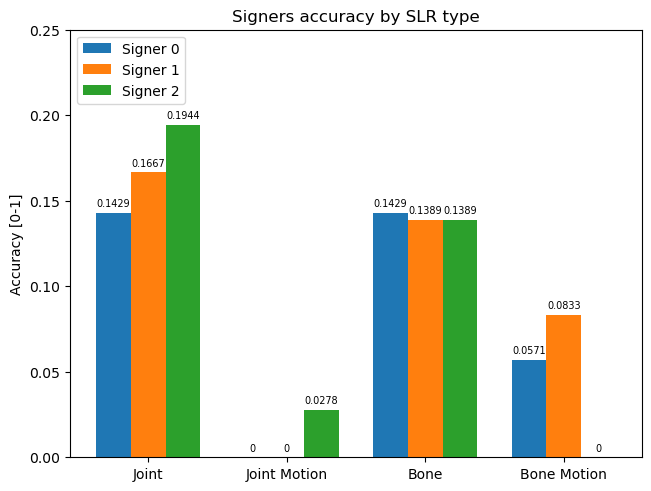

In [15]:
# Accuracy for user

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        user_index = int(name[6])
        if user_index == 3:
            continue
        pred = file_dict[name].argmax()
        acc_tot[user_index] += 1
        if pred == l:
            acc_sum[user_index] += 1
    acc_list = []
    for i in range(len(acc_sum)):
        acc = acc_sum[i] / acc_tot[i]
        print(f"\tUser {i} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("Joint")
acc_list_list.append(acc_per_file(joint_dict))
print("Joint Motion")
acc_list_list.append(acc_per_file(joint_motion_dict))
print("Bone")
acc_list_list.append(acc_per_file(bone_dict))
print("Bone Motion")
acc_list_list.append(acc_per_file(bone_motion_dict))



# Plot
species = ("Joint", "Joint Motion", "Bone", "Bone Motion")
users_means = {
    'Signer 0': [np.round(v[0],4) for v in acc_list_list],
    'Signer 1': [np.round(v[1],4) for v in acc_list_list],
    'Signer 2': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Signers accuracy by SLR type')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.25)
plt.show()


Joint
	Straight accuracy: 0.2702702703
	Left accuracy: 0.1351351351
	Right accuracy: 0.0833333333
Joint Motion
	Straight accuracy: 0.0270270270
	Left accuracy: 0.0000000000
	Right accuracy: 0.0000000000
Bone
	Straight accuracy: 0.2972972973
	Left accuracy: 0.0810810811
	Right accuracy: 0.0277777778
Bone Motion
	Straight accuracy: 0.0540540541
	Left accuracy: 0.0270270270
	Right accuracy: 0.0555555556


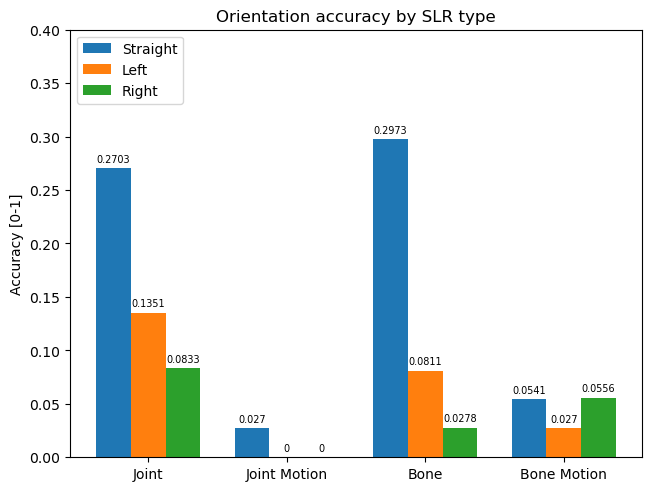

In [16]:
# Accuracy based on orientation.

orientation_dict = {
    'Straight': 0,
    'Left': 1,
    'Right': 2
}

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        for k in orientation_dict.keys():
            if k in name:
                orientation_name = k
                orientation_index = orientation_dict[k]
        pred = file_dict[name].argmax()
        acc_tot[orientation_index] += 1
        if pred == l:
            acc_sum[orientation_index] += 1
    acc_list = []
    for k, idx in orientation_dict.items():
        acc = acc_sum[idx] / acc_tot[idx]
        print(f"\t{k} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("Joint")
acc_list_list.append(acc_per_file(joint_dict))
print("Joint Motion")
acc_list_list.append(acc_per_file(joint_motion_dict))
print("Bone")
acc_list_list.append(acc_per_file(bone_dict))
print("Bone Motion")
acc_list_list.append(acc_per_file(bone_motion_dict))



# Plot
species = ("Joint", "Joint Motion", "Bone", "Bone Motion")
users_means = {
    'Straight': [np.round(v[0],4) for v in acc_list_list],
    'Left': [np.round(v[1],4) for v in acc_list_list],
    'Right': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Orientation accuracy by SLR type')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.4)
plt.show()

# Now with the first stage of skeleton geometrical change

In [17]:
SK_1_JOINT_PLK_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_custom_dataset_rotated_1_joint/eval_results/epoch_0_0.18181818181818182.pkl"

In [18]:
# Load data.
with open(SK_1_JOINT_PLK_PATH, 'rb') as f:
    sk_1_joint_dict = pickle.load(f)

Joint
	User 0 accuracy: 0.1714285714
	User 1 accuracy: 0.1666666667
	User 2 accuracy: 0.2222222222


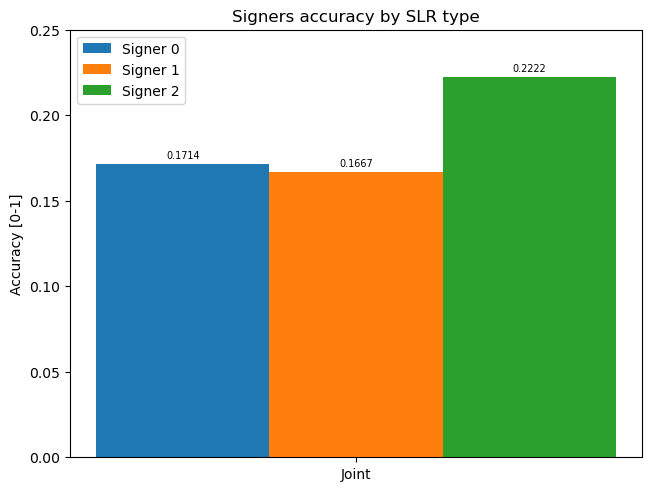

In [19]:
# Accuracy per user

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        user_index = int(name[6])
        if user_index == 3:
            continue
        pred = file_dict[name].argmax()
        acc_tot[user_index] += 1
        if pred == l:
            acc_sum[user_index] += 1
    acc_list = []
    for i in range(len(acc_sum)):
        acc = acc_sum[i] / acc_tot[i]
        print(f"\tUser {i} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("Joint")
acc_list_list.append(acc_per_file(sk_1_joint_dict))

species = (["Joint"])
users_means = {
    'Signer 0': [np.round(v[0],4) for v in acc_list_list],
    'Signer 1': [np.round(v[1],4) for v in acc_list_list],
    'Signer 2': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Signers accuracy by SLR type')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.25)
plt.show()


Joint 2D
	Straight accuracy: 0.3513513514
	Left accuracy: 0.1081081081
	Right accuracy: 0.0833333333
Joint before
	Straight accuracy: 0.2702702703
	Left accuracy: 0.1351351351
	Right accuracy: 0.0833333333


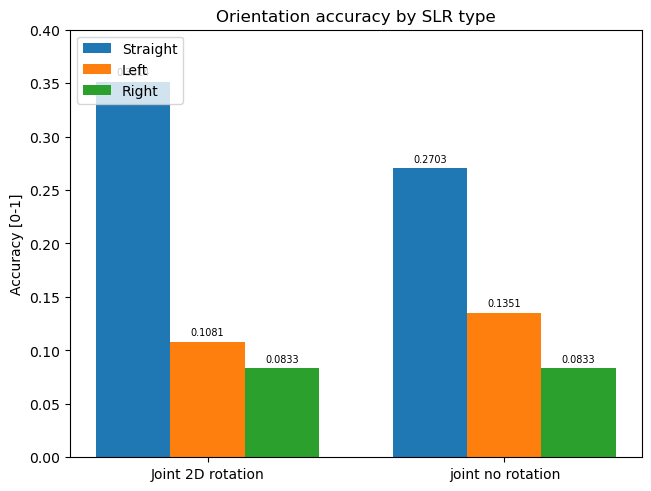

In [20]:
# Accuracy based on orientation.

orientation_dict = {
    'Straight': 0,
    'Left': 1,
    'Right': 2
}

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        for k in orientation_dict.keys():
            if k in name:
                orientation_name = k
                orientation_index = orientation_dict[k]
        pred = file_dict[name].argmax()
        acc_tot[orientation_index] += 1
        if pred == l:
            acc_sum[orientation_index] += 1
    acc_list = []
    for k, idx in orientation_dict.items():
        acc = acc_sum[idx] / acc_tot[idx]
        print(f"\t{k} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("Joint 2D")
acc_list_list.append(acc_per_file(sk_1_joint_dict))
print("Joint before")
acc_list_list.append(acc_per_file(joint_dict))


# Plot
species = (["Joint 2D rotation", "joint no rotation"])
users_means = {
    'Straight': [np.round(v[0],4) for v in acc_list_list],
    'Left': [np.round(v[1],4) for v in acc_list_list],
    'Right': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Orientation accuracy by SLR type')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.4)
plt.show()

# Now with all the possibilities in the 3D rotation

In [21]:
TEST_3D_BIN5_ALL = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_bin5_all/eval_results/epoch_0_0.05454545454545454.pkl"
TEST_3D_BIN5_SH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_bin5_sh/eval_results/epoch_0_0.2.pkl"
TEST_3D_BIN10_ALL = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_bin10_all/eval_results/epoch_0_0.05454545454545454.pkl"
TEST_3D_BIN10_SH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_bin10_sh/eval_results/epoch_0_0.2.pkl"
TEST_3D_BIN20_ALL = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_bin20_all/eval_results/epoch_0_0.05454545454545454.pkl"
TEST_3D_BIN20_SH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_bin20_sh/eval_results/epoch_0_0.2.pkl"
TEST_3D_BIN30_ALL = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_bin30_all/eval_results/epoch_0_0.03636363636363636.pkl"
TEST_3D_BIN30_SH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_bin30_sh/eval_results/epoch_0_0.2.pkl"

TEST_3D_FIXED_ANGLES_ALL = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_fixed_angles_all/eval_results/epoch_0_0.01818181818181818.pkl"
TEST_3D_FIXED_ANGLES_SH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_fixed_angles_sh/eval_results/epoch_0_0.14545454545454545.pkl"
TEST_3D_FIXED_SMALL_ANGLES_ALL = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_fixed_small_angles_all/eval_results/epoch_0_0.07272727272727272.pkl"
TEST_3D_FIXED_SMALL_ANGLES_SH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_fixed_small_angles_sh/eval_results/epoch_0_0.17272727272727273.pkl"

TEST_3D_NORMAL_ANGLES_ALL = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_normal_angles_all/eval_results/epoch_0_0.02727272727272727.pkl"
TEST_3D_NORMAL_ANGLES_SH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_3d_normal_angles_sh/eval_results/epoch_0_0.16363636363636364.pkl"

In [22]:
# Load data.
with open(TEST_3D_BIN5_ALL, 'rb') as f:
    test_3d_bin5_all = pickle.load(f)
with open(TEST_3D_BIN5_SH, 'rb') as f:
    test_3d_bin5_sh = pickle.load(f)
with open(TEST_3D_BIN10_ALL, 'rb') as f:
    test_3d_bin10_all = pickle.load(f)
with open(TEST_3D_BIN10_SH, 'rb') as f:
    test_3d_bin10_sh = pickle.load(f)
with open(TEST_3D_BIN20_ALL, 'rb') as f:
    test_3d_bin20_all = pickle.load(f)
with open(TEST_3D_BIN20_SH, 'rb') as f:
    test_3d_bin20_sh = pickle.load(f)
with open(TEST_3D_BIN30_ALL, 'rb') as f:
    test_3d_bin30_all = pickle.load(f)
with open(TEST_3D_BIN30_SH, 'rb') as f:
    test_3d_bin30_sh = pickle.load(f)

with open(TEST_3D_FIXED_ANGLES_ALL, 'rb') as f:
    test_3d_fixed_angles_all = pickle.load(f)
with open(TEST_3D_FIXED_ANGLES_SH, 'rb') as f:
    test_3d_fixed_angles_sh = pickle.load(f)
with open(TEST_3D_FIXED_SMALL_ANGLES_ALL, 'rb') as f:
    test_3d_fixed_small_angles_all = pickle.load(f)
with open(TEST_3D_FIXED_SMALL_ANGLES_SH, 'rb') as f:
    test_3d_fixed_small_angles_sh = pickle.load(f)

with open(TEST_3D_NORMAL_ANGLES_ALL, 'rb') as f:
    test_3d_normal_angles_all = pickle.load(f)
with open(TEST_3D_NORMAL_ANGLES_SH, 'rb') as f:
    test_3d_normal_angles_sh = pickle.load(f)
    

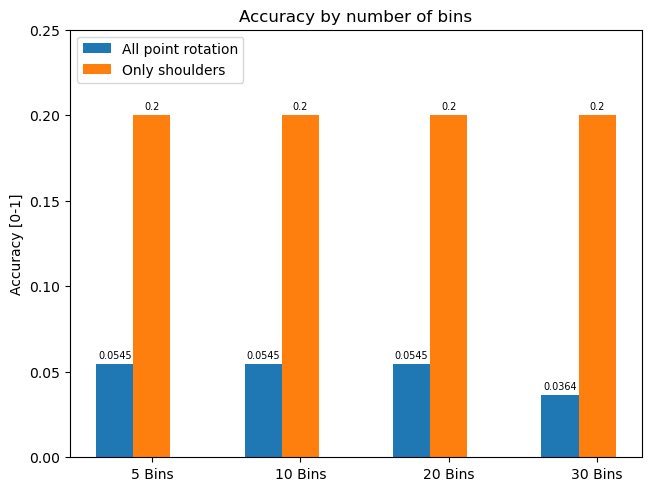

In [23]:
# Accuracy bins.


def acc_per_test(file_dict):
    acc_tot = 0
    acc_sum = 0
    for name, l in label_dict.items():
        pred = file_dict[name].argmax()
        acc_tot += 1
        if pred == l:
            acc_sum += 1
    return acc_sum / acc_tot

acc_list_list = []
acc_list_list.append([acc_per_test(test_3d_bin5_all), acc_per_test(test_3d_bin5_sh)])
acc_list_list.append([acc_per_test(test_3d_bin10_all), acc_per_test(test_3d_bin10_sh)])
acc_list_list.append([acc_per_test(test_3d_bin20_all), acc_per_test(test_3d_bin20_sh)])
acc_list_list.append([acc_per_test(test_3d_bin30_all), acc_per_test(test_3d_bin30_sh)])


# Plot
species = (["5 Bins", "10 Bins", "20 Bins", "30 Bins"])
users_means = {
    'All point rotation': [np.round(v[0],4) for v in acc_list_list],
    'Only shoulders': [np.round(v[1],4) for v in acc_list_list]
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Accuracy by number of bins')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.25)
plt.show()

Accuracy based on orientation all point

5 Bins
	Straight accuracy: 0.1081081081
	Left accuracy: 0.0540540541
	Right accuracy: 0.0000000000
10 Bins
	Straight accuracy: 0.1081081081
	Left accuracy: 0.0540540541
	Right accuracy: 0.0000000000
20 Bins
	Straight accuracy: 0.1081081081
	Left accuracy: 0.0540540541
	Right accuracy: 0.0000000000
30 Bins
	Straight accuracy: 0.0540540541
	Left accuracy: 0.0540540541
	Right accuracy: 0.0000000000


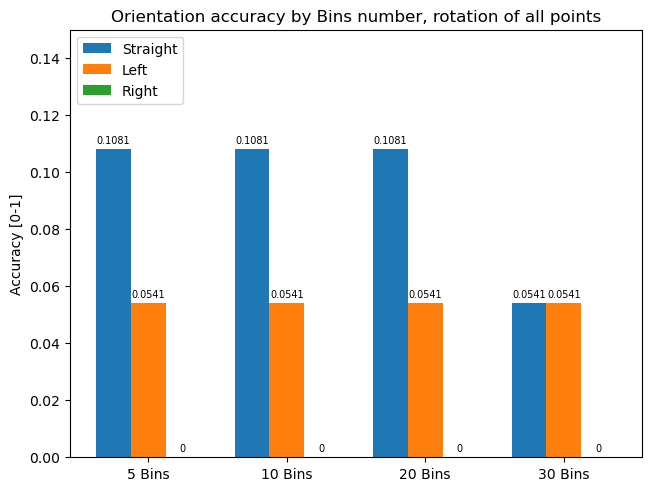

In [24]:
# Accuracy based on orientation.

orientation_dict = {
    'Straight': 0,
    'Left': 1,
    'Right': 2
}

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        for k in orientation_dict.keys():
            if k in name:
                orientation_name = k
                orientation_index = orientation_dict[k]
        pred = file_dict[name].argmax()
        acc_tot[orientation_index] += 1
        if pred == l:
            acc_sum[orientation_index] += 1
    acc_list = []
    for k, idx in orientation_dict.items():
        acc = acc_sum[idx] / acc_tot[idx]
        print(f"\t{k} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("5 Bins")
acc_list_list.append(acc_per_file(test_3d_bin5_all))
print("10 Bins")
acc_list_list.append(acc_per_file(test_3d_bin10_all))
print("20 Bins")
acc_list_list.append(acc_per_file(test_3d_bin20_all))
print("30 Bins")
acc_list_list.append(acc_per_file(test_3d_bin30_all))

# Plot
species = (["5 Bins", "10 Bins", "20 Bins", "30 Bins"])
users_means = {
    'Straight': [np.round(v[0],4) for v in acc_list_list],
    'Left': [np.round(v[1],4) for v in acc_list_list],
    'Right': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Orientation accuracy by Bins number, rotation of all points')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.15)
plt.show()

now for only shoulder

5 Bins
	Straight accuracy: 0.3513513514
	Left accuracy: 0.1621621622
	Right accuracy: 0.0833333333
10 Bins
	Straight accuracy: 0.3513513514
	Left accuracy: 0.1621621622
	Right accuracy: 0.0833333333
20 Bins
	Straight accuracy: 0.3513513514
	Left accuracy: 0.1621621622
	Right accuracy: 0.0833333333
30 Bins
	Straight accuracy: 0.3513513514
	Left accuracy: 0.1621621622
	Right accuracy: 0.0833333333


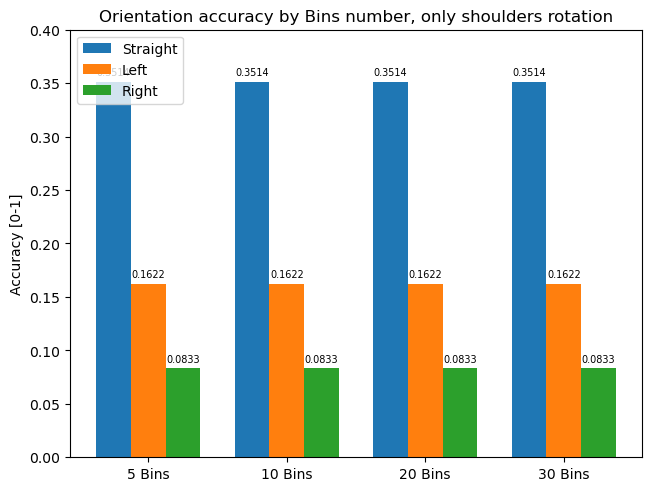

In [25]:
# Accuracy based on orientation.

orientation_dict = {
    'Straight': 0,
    'Left': 1,
    'Right': 2
}

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        for k in orientation_dict.keys():
            if k in name:
                orientation_name = k
                orientation_index = orientation_dict[k]
        pred = file_dict[name].argmax()
        acc_tot[orientation_index] += 1
        if pred == l:
            acc_sum[orientation_index] += 1
    acc_list = []
    for k, idx in orientation_dict.items():
        acc = acc_sum[idx] / acc_tot[idx]
        print(f"\t{k} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("5 Bins")
acc_list_list.append(acc_per_file(test_3d_bin5_sh))
print("10 Bins")
acc_list_list.append(acc_per_file(test_3d_bin10_sh))
print("20 Bins")
acc_list_list.append(acc_per_file(test_3d_bin20_sh))
print("30 Bins")
acc_list_list.append(acc_per_file(test_3d_bin30_sh))

# Plot
species = (["5 Bins", "10 Bins", "20 Bins", "30 Bins"])
users_means = {
    'Straight': [np.round(v[0],4) for v in acc_list_list],
    'Left': [np.round(v[1],4) for v in acc_list_list],
    'Right': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Orientation accuracy by Bins number, only shoulders rotation')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.4)
plt.show()

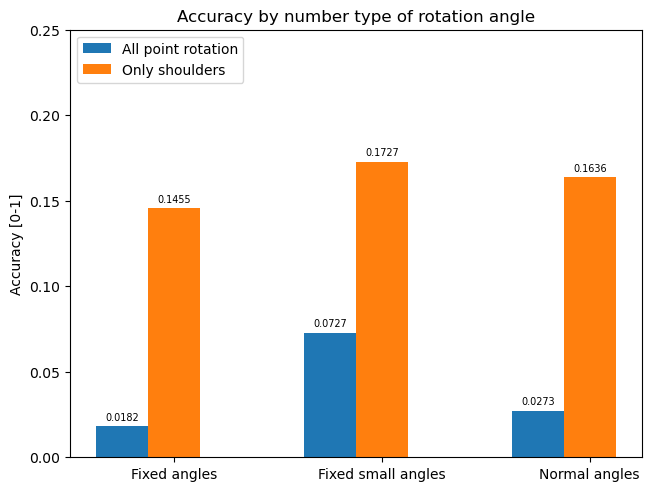

In [26]:
# Accuracy angles.


def acc_per_test(file_dict):
    acc_tot = 0
    acc_sum = 0
    for name, l in label_dict.items():
        pred = file_dict[name].argmax()
        acc_tot += 1
        if pred == l:
            acc_sum += 1
    return acc_sum / acc_tot

acc_list_list = []
acc_list_list.append([acc_per_test(test_3d_fixed_angles_all), acc_per_test(test_3d_fixed_angles_sh)])
acc_list_list.append([acc_per_test(test_3d_fixed_small_angles_all), acc_per_test(test_3d_fixed_small_angles_sh)])
acc_list_list.append([acc_per_test(test_3d_normal_angles_all), acc_per_test(test_3d_normal_angles_sh)])


# Plot
species = (["Fixed angles", "Fixed small angles", "Normal angles"])
users_means = {
    'All point rotation': [np.round(v[0],4) for v in acc_list_list],
    'Only shoulders': [np.round(v[1],4) for v in acc_list_list]
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Accuracy by number type of rotation angle')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.25)
plt.show()

Now like before for each orientation

Accuracy based on orientation all point

5 Bins
	Straight accuracy: 0.0000000000
	Left accuracy: 0.0000000000
	Right accuracy: 0.0555555556
10 Bins
	Straight accuracy: 0.1351351351
	Left accuracy: 0.0270270270
	Right accuracy: 0.0555555556
20 Bins
	Straight accuracy: 0.0810810811
	Left accuracy: 0.0000000000
	Right accuracy: 0.0000000000


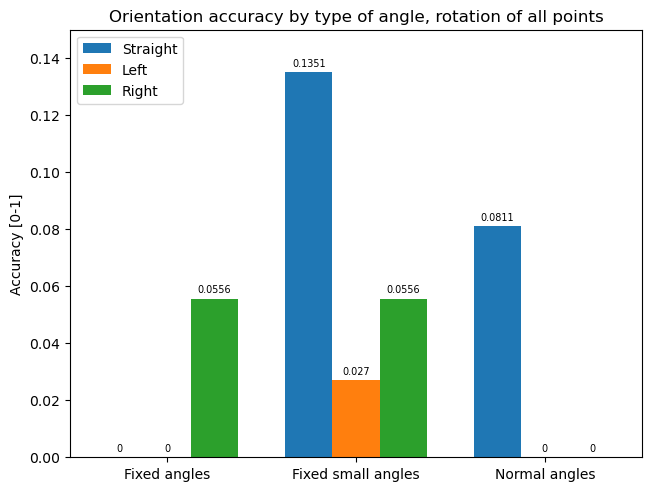

In [27]:
# Accuracy based on orientation.

orientation_dict = {
    'Straight': 0,
    'Left': 1,
    'Right': 2
}

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        for k in orientation_dict.keys():
            if k in name:
                orientation_name = k
                orientation_index = orientation_dict[k]
        pred = file_dict[name].argmax()
        acc_tot[orientation_index] += 1
        if pred == l:
            acc_sum[orientation_index] += 1
    acc_list = []
    for k, idx in orientation_dict.items():
        acc = acc_sum[idx] / acc_tot[idx]
        print(f"\t{k} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("5 Bins")
acc_list_list.append(acc_per_file(test_3d_fixed_angles_all))
print("10 Bins")
acc_list_list.append(acc_per_file(test_3d_fixed_small_angles_all))
print("20 Bins")
acc_list_list.append(acc_per_file(test_3d_normal_angles_all))

# Plot
species = (["Fixed angles", "Fixed small angles", "Normal angles"])
users_means = {
    'Straight': [np.round(v[0],4) for v in acc_list_list],
    'Left': [np.round(v[1],4) for v in acc_list_list],
    'Right': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Orientation accuracy by type of angle, rotation of all points')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.15)
plt.show()

now for only shoulder

5 Bins
	Straight accuracy: 0.2432432432
	Left accuracy: 0.1081081081
	Right accuracy: 0.0833333333
10 Bins
	Straight accuracy: 0.2972972973
	Left accuracy: 0.1351351351
	Right accuracy: 0.0833333333
20 Bins
	Straight accuracy: 0.2702702703
	Left accuracy: 0.1351351351
	Right accuracy: 0.0833333333


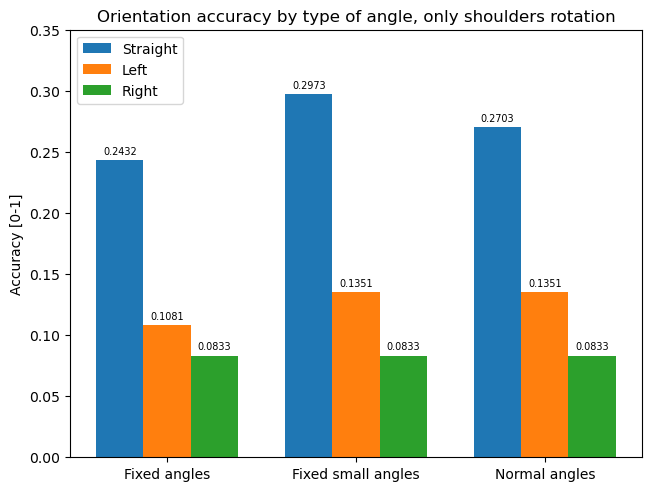

In [28]:
# Accuracy based on orientation.

orientation_dict = {
    'Straight': 0,
    'Left': 1,
    'Right': 2
}

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        for k in orientation_dict.keys():
            if k in name:
                orientation_name = k
                orientation_index = orientation_dict[k]
        pred = file_dict[name].argmax()
        acc_tot[orientation_index] += 1
        if pred == l:
            acc_sum[orientation_index] += 1
    acc_list = []
    for k, idx in orientation_dict.items():
        acc = acc_sum[idx] / acc_tot[idx]
        print(f"\t{k} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("5 Bins")
acc_list_list.append(acc_per_file(test_3d_fixed_angles_sh))
print("10 Bins")
acc_list_list.append(acc_per_file(test_3d_fixed_small_angles_sh))
print("20 Bins")
acc_list_list.append(acc_per_file(test_3d_normal_angles_sh))

# Plot
species = (["Fixed angles", "Fixed small angles", "Normal angles"])
users_means = {
    'Straight': [np.round(v[0],4) for v in acc_list_list],
    'Left': [np.round(v[1],4) for v in acc_list_list],
    'Right': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Orientation accuracy by type of angle, only shoulders rotation')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.35)
plt.show()

No rotation
	Straight accuracy: 0.2702702703
	Left accuracy: 0.1351351351
	Right accuracy: 0.0833333333
2D rotation
	Straight accuracy: 0.3513513514
	Left accuracy: 0.1081081081
	Right accuracy: 0.0833333333
5 Bins
	Straight accuracy: 0.3513513514
	Left accuracy: 0.1621621622
	Right accuracy: 0.0833333333


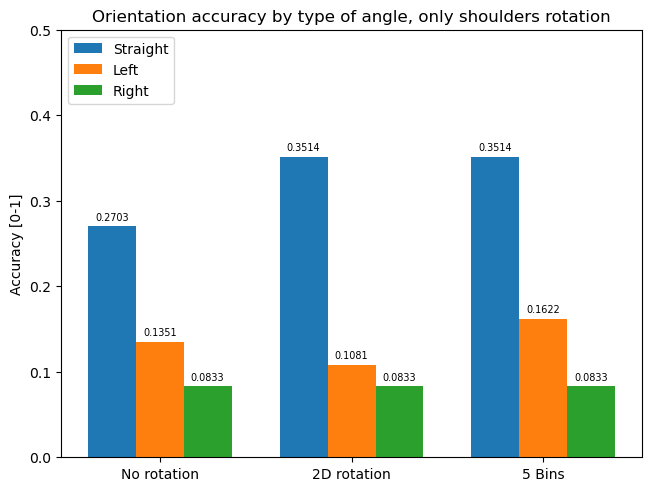

In [30]:
# Graph for slides.

orientation_dict = {
    'Straight': 0,
    'Left': 1,
    'Right': 2
}

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        for k in orientation_dict.keys():
            if k in name:
                orientation_name = k
                orientation_index = orientation_dict[k]
        pred = file_dict[name].argmax()
        acc_tot[orientation_index] += 1
        if pred == l:
            acc_sum[orientation_index] += 1
    acc_list = []
    for k, idx in orientation_dict.items():
        acc = acc_sum[idx] / acc_tot[idx]
        print(f"\t{k} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("No rotation")
acc_list_list.append(acc_per_file(joint_dict))
print("2D rotation")
acc_list_list.append(acc_per_file(sk_1_joint_dict))
print("5 Bins")
acc_list_list.append(acc_per_file(test_3d_bin5_sh))

# Plot
species = (["No rotation", "2D rotation", "5 Bins"])
users_means = {
    'Straight': [np.round(v[0],4) for v in acc_list_list],
    'Left': [np.round(v[1],4) for v in acc_list_list],
    'Right': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Orientation accuracy by type of angle, only shoulders rotation')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.5)
plt.show()

No rotation
	Straight accuracy: 0.2702702703
	Left accuracy: 0.1351351351
	Right accuracy: 0.0833333333
2D rotation
	Straight accuracy: 0.3513513514
	Left accuracy: 0.1081081081
	Right accuracy: 0.0833333333
5 Bins
	Straight accuracy: 0.3513513514
	Left accuracy: 0.1621621622
	Right accuracy: 0.0833333333


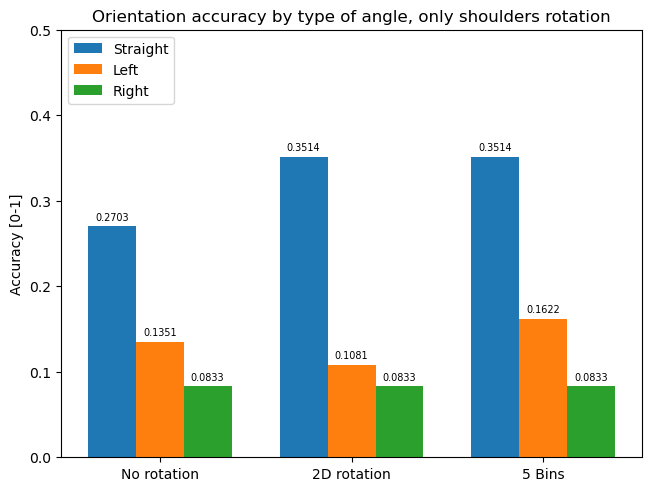

In [ ]:
# Graph for slide.

orientation_dict = {
    'Straight': 0,
    'Left': 1,
    'Right': 2
}

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        for k in orientation_dict.keys():
            if k in name:
                orientation_name = k
                orientation_index = orientation_dict[k]
        pred = file_dict[name].argmax()
        acc_tot[orientation_index] += 1
        if pred == l:
            acc_sum[orientation_index] += 1
    acc_list = []
    for k, idx in orientation_dict.items():
        acc = acc_sum[idx] / acc_tot[idx]
        print(f"\t{k} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("No rotation")
acc_list_list.append(acc_per_file(joint_dict))
print("2D rotation")
acc_list_list.append(acc_per_file(sk_1_joint_dict))
print("5 Bins")
acc_list_list.append(acc_per_file(test_3d_bin5_sh))
print("Fixed angle, only shoulders")
acc_list_list.append(acc_per_file(test_3d_fixed_angles_sh))
print("Fixed small angle, only shoulders")
acc_list_list.append(acc_per_file(test_3d_fixed_small_angles_sh))


# Plot
species = (["No rotation", "2D rotation", "5 Bins", "Fixed angle, only shoulders", "Fixed small angle, only shoulders"])
users_means = {
    'Straight': [np.round(v[0],4) for v in acc_list_list],
    'Left': [np.round(v[1],4) for v in acc_list_list],
    'Right': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Orientation accuracy by type of angle, only shoulders rotation')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.5)
plt.show()